# Demo: Defining Control_M Workflows using Python

# Step 1 - Setup

## Step 1A - Install the library

In [9]:
# This command needs to be done only once. This installs the library
#!pip  install git+https://github.com/tadinve/naga.git

In [10]:
import os, sys
cwd = os.getcwd()
module_path = cwd.split("/")
mp = []
for d in module_path:
    mp.append(d)
    if d == "ctm_python_client":
        break
module_path = "/".join(mp)
module_path


'/Users/vtadinad/Documents/PythonProjects/ctm_python_client'

In [11]:
sys.path.append(module_path)
sys.path

['/Users/vtadinad/Documents/PythonProjects/ctm_python_client/examples/notebooks',
 '/Users/vtadinad/.vscode/extensions/ms-toolsai.jupyter-2021.8.1236758218/pythonFiles',
 '/Users/vtadinad/.vscode/extensions/ms-toolsai.jupyter-2021.8.1236758218/pythonFiles/lib/python',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python38.zip',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8',
 '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/python3.8/lib-dynload',
 '',
 '/Users/vtadinad/Documents/PythonProjects/ctm_python_client/venv/lib/python3.8/site-packages',
 '/Users/vtadinad/Documents/PythonProjects/ctm_python_client/venv/lib/python3.8/site-packages/IPython/extensions',
 '/Users/vtadinad/.ipython',
 '/Users/vtadinad/Documents/PythonProjects/ctm_python_client',
 '/Users/vtadinad/Documents/PythonProjects/ctm_python_client',
 '/Users/vtadinad/Documents/Pytho

## Step 1B- Import the library

In [12]:
from ctm_python_client.core.bmc_control_m import CmJobFlow
from ctm_python_client.jobs.dummy import DummyJob

# Step 2 - Instantiate, Authenticate and Schedule


## Step 2A - Create the object

In [13]:
# Please change the URfrI, and ctm_user and enter ctm_password to match your environment
from ctm_python_client.session.session import Session

import getpass
ctm_uri =  "https://acb-rhctmv20.centralus.cloudapp.azure.com:8443/automation-api"
ctm_user =  "vtadinad"
ctm_pwd =                                                                                                                                               "P4ssw0rd"
if "ctm_pwd" not in locals(): # has not been enterd once, will skip next time
    ctm_pwd = getpass.getpass("Enter your Control M Password ")

session = Session( endpoint=ctm_uri,username=ctm_user,password=ctm_pwd)
session.get_token()

'EF346D58EEAE1599A9149E46B0D84088F004C621EFB3397E916538779E9A7EBDD637176EA33EC29606C250E001392497FB645EE2D30A78FC80B3871419441645'

In [14]:
t1_flow = CmJobFlow(application="Naga0.2_Demo",sub_application="Demo-02",session=session)

## Step 2B - Define the Schedule

In [15]:
t1_flow.set_run_as(username="ctmuser",host="acb-rhctmv20")

In [16]:
# Define the schedule
months = ["JAN", "OCT", "DEC"]
monthDays = ["ALL"]
weekDays = ["MON","TUE", "WED", "THU", "FRI"]
fromTime = "0300"
toTime = "2100"
t1_flow.set_schedule(months, monthDays, weekDays,fromTime, toTime)


# Step 3  - Create Folder

In [17]:
# Create Fodler
f1 = t1_flow.create_folder(name="HelloWorld")

# Step 4 - Create Tasks

In [18]:
start = t1_flow.add_job( f1, DummyJob(f1,"Start-Flow") )
end = t1_flow.add_job(f1, DummyJob(f1,"End-Flow") )

hello_world_id = t1_flow.add_job(f1,  DummyJob(f1, "Hello-World" ) )


# Step 5 - Chain Tasks

In [19]:
# start >>  hello_world_id >> end
t1_flow.chain_jobs(f1,[start, hello_world_id, end])

['Start-Flow', 'End-Flow', 'Hello-World']
['0', '2', '1']


# Step 6 - Display Workflow

## Step 6A - Display DAG

In [20]:
# View the t1_flow Details
nodes, edges = t1_flow.get_nodes_and_edges()
nodes, edges

(['Start-Flow', 'End-Flow', 'Hello-World'],
 [('Start-Flow', 'Hello-World'), ('Hello-World', 'End-Flow')])

=========== Jobflow Details ===================
Application:  Naga0.2_Demo
Sub Application:  Demo-02
Folder Name: HelloWorld 





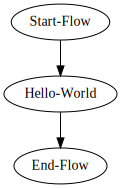

In [22]:
#display using graphviz
from ctm_python_client.utils.displayDAG import DisplayDAG

#sudo apt-get install graphviz (on unix)
#  or 
# brew install graphviz (for mac)
DisplayDAG(t1_flow).display_graphviz()

## Step 6B - Display JSON

In [23]:
t1_flow.display_json()

{
    "Defaults": {
        "Application": "Naga0.2_Demo",
        "SubApplication": "Demo-02",
        "RunAs": "ctmuser",
        "Host": "acb-rhctmv20",
        "When": {
            "Months": [
                "JAN",
                "OCT",
                "DEC"
            ],
            "MonthDays": [
                "ALL"
            ],
            "WeekDays": [
                "MON",
                "TUE",
                "WED",
                "THU",
                "FRI"
            ],
            "FromTime": "0300",
            "ToTime": "2100"
        }
    },
    "HelloWorld": {
        "Type": "Folder",
        "Start-Flow": {
            "Type": "Job:Dummy"
        },
        "End-Flow": {
            "Type": "Job:Dummy"
        },
        "Hello-World": {
            "Type": "Job:Dummy"
        },
        "Flow1": {
            "Type": "Flow",
            "Sequence": [
                "Start-Flow",
                "Hello-World",
                "End-Flow"
            ]
 

# Step 7 - Submit Workflow to Control-M

In [24]:
t1_flow.deploy()

[{'deployed_calendars': None,
 'deployed_connection_profiles': None,
 'deployed_drivers': None,
 'deployed_folders': ['HelloWorld'],
 'deployed_jobs': None,
 'deployment_file': 'jobs.json',
 'errors': None,
 'is_deploy_descriptor_valid': False,
 'successful_calendars_count': None,
 'successful_connection_profiles_count': 0,
 'successful_drivers_count': 0,
 'successful_folders_count': 0,
 'successful_jobs_count': 3,
 'successful_smart_folders_count': 1,
 'successful_sub_folders_count': 0,
 'warnings': None}]
Successfully submitted to Control-M
Login to None/ControlM/ and use your workflow


True

In [25]:
t1_flow.run()

{'monitor_page_uri': None,
 'run_id': 'b2a02b96-5f53-4c0d-848d-e549b3095e59',
 'status_uri': 'https://acb-rhctmv20.centralus.cloudapp.azure.com:8443/automation-api/run/status/b2a02b96-5f53-4c0d-848d-e549b3095e59'}
Successfully Run job on Control-M
Login to None/ControlM/ and use your workflow


True